**Proyecto**

Presentado por : Jordy Mesa

In [1]:
import os
import pandas as pd
import numpy as np
import pystan
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
link='https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'

In [4]:
coronavirus=pd.read_csv(link)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
coronavirus.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [7]:
coronavirus = coronavirus[coronavirus["Nombre municipio"]=="BOGOTA"]

In [8]:
coronavirus.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
7,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
8,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
9,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
10,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


**Analisis descriptivo**

In [9]:
coronavirus.describe()

,ID de caso,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Edad,Unidad de medida de edad,Código ISO del país,Pertenencia étnica
count,1.461086e+06,1461086.0,1461086.0,1.461086e+06,1.461086e+06,939.000000,1.459298e+06
mean,2.514917e+06,11.0,11001.0,3.856686e+01,1.003787e+00,607.724175,5.957585e+00
std,1.457230e+06,0.0,0.0,1.765403e+01,6.616344e-02,260.547528,4.273678e-01
min,1.000000e+00,11.0,11001.0,1.000000e+00,1.000000e+00,20.000000,1.000000e+00
25%,1.277406e+06,11.0,11001.0,2.600000e+01,1.000000e+00,484.000000,6.000000e+00
50%,2.630616e+06,11.0,11001.0,3.600000e+01,1.000000e+00,724.000000,6.000000e+00
75%,3.770343e+06,11.0,11001.0,5.100000e+01,1.000000e+00,840.000000,6.000000e+00
max,5.055280e+06,11.0,11001.0,1.140000e+02,3.000000e+00,862.000000,6.000000e+00


In [10]:
coronavirus.mean

<bound method DataFrame.mean of           fecha reporte web  ...  Nombre del grupo étnico
0          6/3/2020 0:00:00  ...                      NaN
7         11/3/2020 0:00:00  ...                      NaN
8         11/3/2020 0:00:00  ...                      NaN
9         12/3/2020 0:00:00  ...                      NaN
10        12/3/2020 0:00:00  ...                      NaN
...                     ...  ...                      ...
5055208  24/11/2021 0:00:00  ...                      NaN
5055234  24/11/2021 0:00:00  ...                      NaN
5055235  24/11/2021 0:00:00  ...                      NaN
5055236  24/11/2021 0:00:00  ...                      NaN
5055239  24/11/2021 0:00:00  ...                      NaN

[1461086 rows x 23 columns]>

In [11]:
coronavirus=coronavirus['fecha reporte web'].value_counts()

In [12]:
coronavirus=pd.DataFrame({'fecha reporte web':coronavirus.index, 'casos':coronavirus.values})

In [13]:
coronavirus


,fecha reporte web,casos
0,24/6/2021 0:00:00,15569
1,17/6/2021 0:00:00,12493
2,19/6/2021 0:00:00,11729
3,1/7/2021 0:00:00,11545
4,30/6/2021 0:00:00,11493
...,...,...
620,22/3/2020 0:00:00,4
621,11/3/2020 0:00:00,2
622,12/3/2020 0:00:00,2
623,6/3/2020 0:00:00,1


In [14]:
df=coronavirus

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 585 to 465
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha reporte web  625 non-null    datetime64[ns]
 1   casos              625 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.6 KB


In [49]:
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])
df=df.sort_values(by='fecha reporte web')

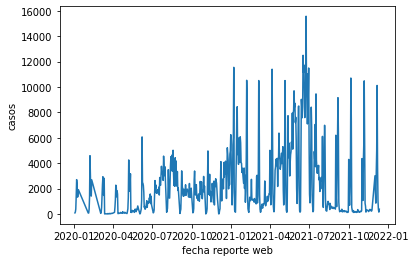

In [50]:
sns.lineplot(data=df,y='casos',x='fecha reporte web')

In [51]:
df_1= np.array(df['casos'].values)
generator = TimeseriesGenerator(df_1,df_1,length=10,batch_size=12)

In [52]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='linear'))

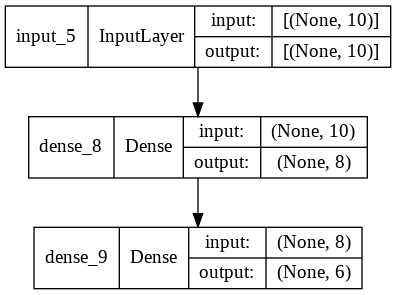

In [53]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [54]:
model.compile(loss='mse',optimizer='adam')

In [55]:
model.fit_generator(generator,epochs=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/200
52/52 [==============================] - 0s 2ms/step - loss: 11576559.0000
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 9831725.0000
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 8713081.0000
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 7940099.5000
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 7241254.5000
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 6670876.5000
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 6172988.0000
Epoch 8/200
52/52 [==============================] - 0s 2ms/step - loss: 5699279.0000
Epoch 9/200
52/52 [==============================] - 0s 2ms/step - loss: 5157734.5000
Epoch 10/200
52/52 [==============================] - 0s 2ms/step - loss: 4806228.0000
Epoch 11/200
52/52 [==============================] - 0s 1ms/step - loss: 4599188.0000
Epoch 12/200
52/52 [==============================]

In [56]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
y_pred = model.predict_generator(generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


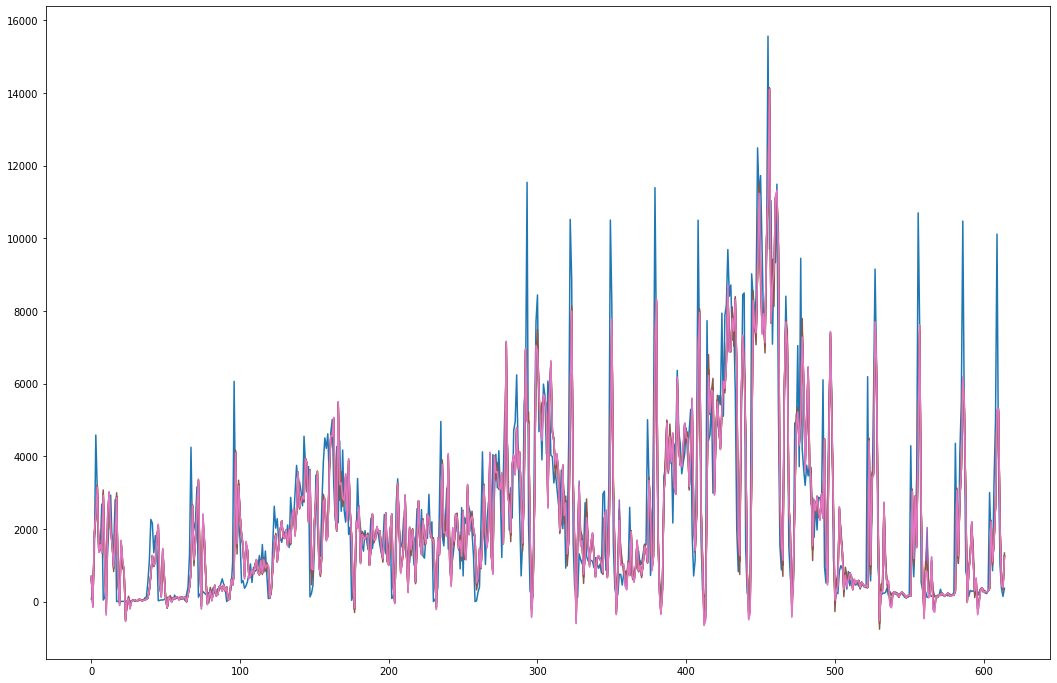

In [58]:
plt.figure(figsize=(18,12))

plt.plot(df_1[10:])

plt.plot(y_pred)